In [42]:
import numpy as np
import scipy

import sklearn

import pandas as pd

import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

data = np.genfromtxt('housingUnits.csv', delimiter=',')
print(data.shape)

(20641, 8)


In [43]:
df = pd.read_csv("housingUnits.csv")

In [44]:
df.columns = ["median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean", "median_value"]

# 1

Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict median house values in a block?

array([[<Axes: xlabel='median_age', ylabel='median_age'>,
        <Axes: xlabel='total_rooms', ylabel='median_age'>,
        <Axes: xlabel='total_bedrooms', ylabel='median_age'>,
        <Axes: xlabel='population', ylabel='median_age'>,
        <Axes: xlabel='households', ylabel='median_age'>,
        <Axes: xlabel='median_income', ylabel='median_age'>,
        <Axes: xlabel='ocean', ylabel='median_age'>,
        <Axes: xlabel='median_value', ylabel='median_age'>],
       [<Axes: xlabel='median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='total_bedrooms', ylabel='total_rooms'>,
        <Axes: xlabel='population', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='ocean', ylabel='total_rooms'>,
        <Axes: xlabel='median_value', ylabel='total_rooms'>],
       [<Axes: xlabel='median_age', ylabel='total_be

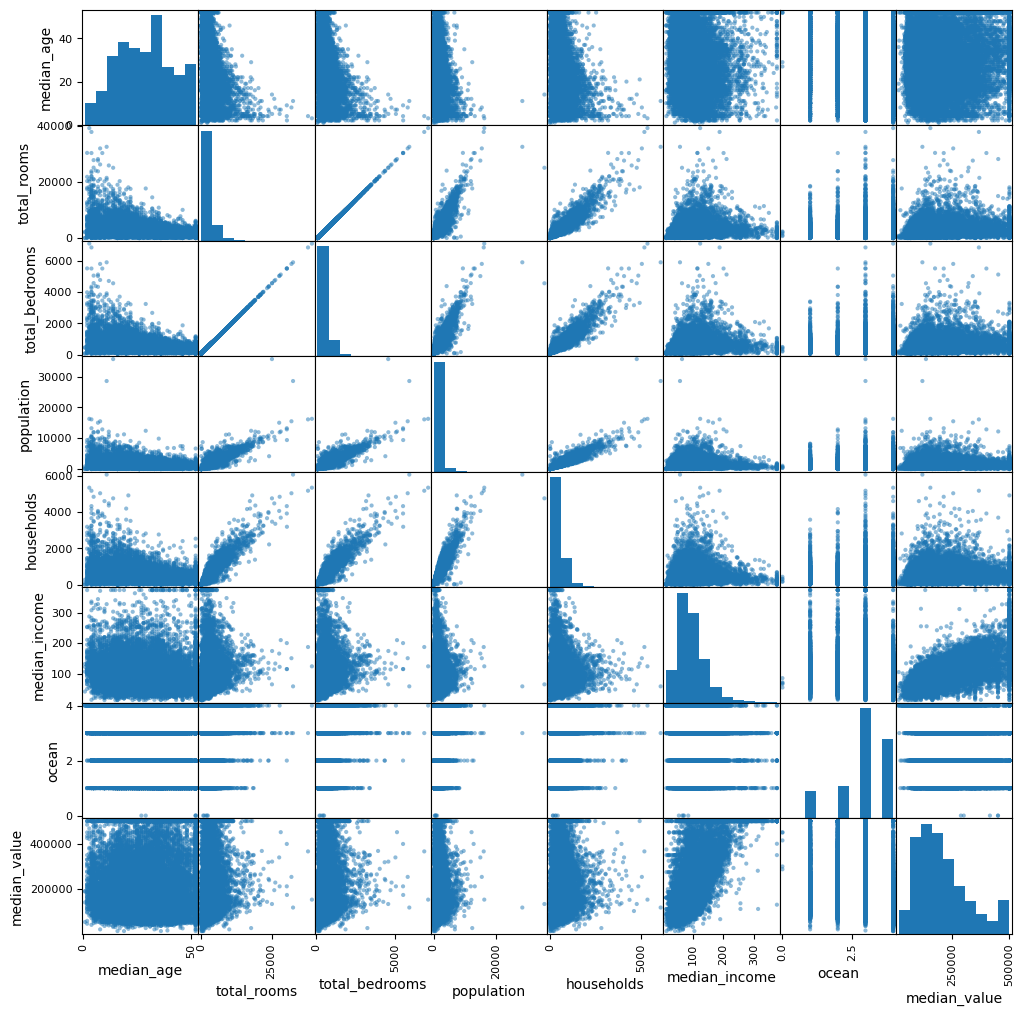

In [45]:
predictors = df.columns
df = pd.DataFrame(data, columns=predictors)
df = df.dropna()
pd.plotting.scatter_matrix(df, figsize=(12, 12))

In [46]:
df["rooms_per_person"] = df["total_rooms"] / df["population"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_person"] = df["total_bedrooms"] / df["population"]
df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]

correlations = df.corr()["median_value"].sort_values(ascending=False)
print("Correlation of variables with median house value:\n", correlations)

Correlation of variables with median house value:
 median_value              1.000000
median_income             0.688075
rooms_per_person          0.209482
rooms_per_household       0.151948
total_bedrooms            0.134154
total_rooms               0.134153
bedrooms_per_person       0.113095
median_age                0.105623
households                0.065843
bedrooms_per_household    0.058260
population               -0.024650
ocean                    -0.397251
Name: median_value, dtype: float64


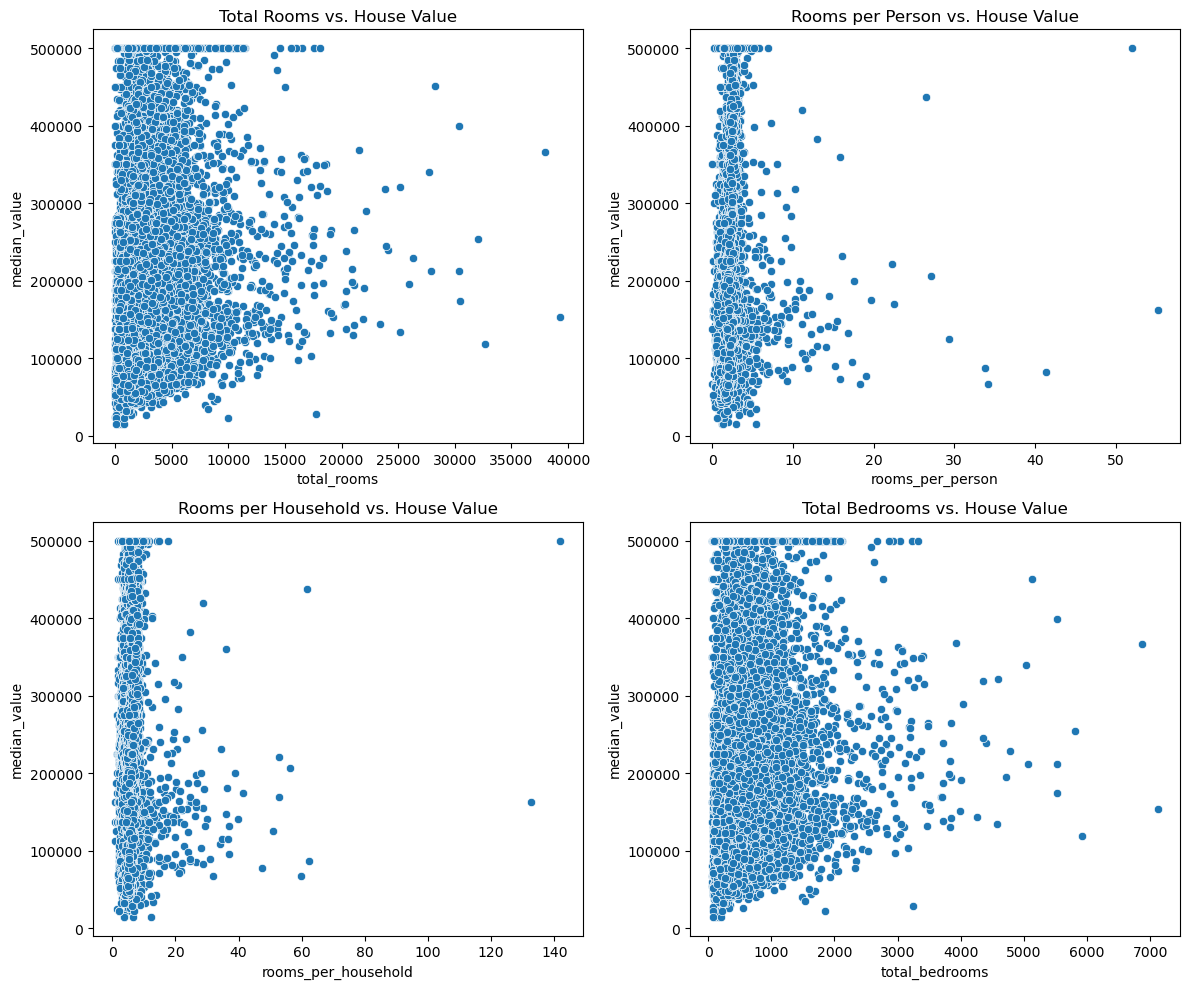

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df["total_rooms"], y=df["median_value"], ax=axes[0, 0]).set(title="Total Rooms vs. House Value")
sns.scatterplot(x=df["rooms_per_person"], y=df["median_value"], ax=axes[0, 1]).set(title="Rooms per Person vs. House Value")
sns.scatterplot(x=df["rooms_per_household"], y=df["median_value"], ax=axes[1, 0]).set(title="Rooms per Household vs. House Value")
sns.scatterplot(x=df["total_bedrooms"], y=df["median_value"], ax=axes[1, 1]).set(title="Total Bedrooms vs. House Value")
plt.tight_layout()
plt.show()

In [48]:
corr_total_rooms = df["total_rooms"].corr(df["median_value"])
corr_rooms_per_person = df["rooms_per_person"].corr(df["median_value"])
corr_rooms_per_household = df["rooms_per_household"].corr(df["median_value"])
corr_total_bedrooms = df["total_bedrooms"].corr(df["median_value"])

print(f"Correlation between Total Rooms and House Value: {corr_total_rooms}")
print(f"Correlation between Rooms per Person and House Value: {corr_rooms_per_person}")
print(f"Correlation between Rooms per Household and House Value: {corr_rooms_per_household}")
print(f"Correlation between Total Bedrooms and House Value: {corr_total_bedrooms}")

Correlation between Total Rooms and House Value: 0.1341531138065631
Correlation between Rooms per Person and House Value: 0.20948196900668967
Correlation between Rooms per Household and House Value: 0.15194828974145796
Correlation between Total Bedrooms and House Value: 0.1341536985700889


First, to visualize the data, I drew scatter point for the row data of predictor 2 and 3 and the standardized data of them. To better understand the relationship between them, I calculated the correlation coefficient between them  and the median value. In this way, I found out that the standardized data performed better in predicting the house value. Then, I did a linear regression to examine this standardization, resulting that this model doesn't explain much of the variation. 

In [49]:
X = df[["rooms_per_household", "bedrooms_per_household"]]
y = df["median_value"]

model = LinearRegression()
model.fit(X, y)

print("Linear Regression Coefficients:", model.coef_)
print("Linear Regression Intercept:", model.intercept_)

r_squared = model.score(X, y)
print("R-squared:", r_squared)

Linear Regression Coefficients: [ 7767.36586746 -3153.56200194]
Linear Regression Intercept: 168572.0873851597
R-squared: 0.02366654025181636


In [50]:
X = df[["total_rooms", "total_bedrooms"]]
y = df["median_value"]

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.017997758190134716


Since row total rooms and total bedrooms were misleading as block sizes vary, Dividing by household count gives a better measure of house size. That's why it is better to standardize/normalize the predictor 2 and 3. However, R² = 0.0237 (≈ 2.37%) → This is very low, meaning the model explains only about 2.37% of the variability in house values.
This suggests that rooms per household and bedrooms per household alone are not strong predictors of house prices. Other factors (like income, location, etc.) likely play a much bigger role. 
Also, comparatively, standardized data is better based on the r squared value. 

Because predictor 4 and 5 don't tell us about individual house characteristics. Two blocks with the same population might have very different house sizes and prices. Therefore, there are not very useful by themselves as predictors.

# 2

To meaningfully use predictor variables 2 (number of rooms) and 3 (number of
bedrooms), you will need to standardize/normalize them. Using the data, is it better
to normalize them by population (4) or number of households (5)?

In [51]:
correlations = df[["rooms_per_person", "rooms_per_household", 
                    "bedrooms_per_person", "bedrooms_per_household", 
                    "median_value"]].corr()

print(correlations["median_value"])

rooms_per_person          0.209482
rooms_per_household       0.151948
bedrooms_per_person       0.113095
bedrooms_per_household    0.058260
median_value              1.000000
Name: median_value, dtype: float64


In [52]:
y = df["median_value"].values
def r2(i):
    X = df[[i]].values  
    model = LinearRegression().fit(X, y)
    return model.score(X, y)

rp = r2("rooms_per_person")
rh = r2("rooms_per_household")
bp = r2("bedrooms_per_person")
bh = r2("bedrooms_per_household")
print("R² for Rooms per Population and Median House Value:",rp)
print("R² for Rooms per Household and Median House Value:",rh)
print("R² for Bedrooms per Population and Median House Value:",bp)
print("R² for Bedrooms per Household and Median House Value:",bh)

R² for Rooms per Population and Median House Value: 0.043882695338919864
R² for Rooms per Household and Median House Value: 0.023088282755354128
R² for Bedrooms per Population and Median House Value: 0.012790501296178869
R² for Bedrooms per Household and Median House Value: 0.003394278159693398


Rooms per Person (0.209) has a higher correlation with median house value than Rooms per Household (0.152).
Bedrooms per Person (0.113) has a higher correlation with median house value than Bedrooms per Household (0.058).
Since both rooms per person and bedrooms per person show stronger correlations with house value than their perhousehold counterparts, normalizing by population is the better choice in this dataset.

This suggests that the number of rooms and bedrooms available per resident has a more meaningful relationship with house value than the number per household.
This might be due to variability in household sizes—some blocks may have more people per household, which affects house values differently than just the number of households.

# 3

Which of the seven variables is most *and* least predictive of housing value, from a
simple linear regression perspective?

In [53]:
correlations = df[["median_age", "rooms_per_person", "rooms_per_household",
                   "bedrooms_per_person", "bedrooms_per_household",
                   "median_income", "ocean", "median_value"]].corr()

print(correlations["median_value"].sort_values(ascending=False))

median_value              1.000000
median_income             0.688075
rooms_per_person          0.209482
rooms_per_household       0.151948
bedrooms_per_person       0.113095
median_age                0.105623
bedrooms_per_household    0.058260
ocean                    -0.397251
Name: median_value, dtype: float64


In [60]:

columns = ["median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean", "median_value","rooms_per_person", "rooms_per_household","bedrooms_per_person", "bedrooms_per_household"]

r_squared_values = {}

for i in columns:
    r_squared_values[i] = r2(i) # Fixed variable name


sorted_r_squared = sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True)

print(sorted_r_squared)

[('median_value', 1.0), ('median_income', 0.47344749180719903), ('ocean', 0.15780848616855125), ('rooms_per_person', 0.043882695338919864), ('rooms_per_household', 0.023088282755354128), ('total_bedrooms', 0.01799721484003436), ('total_rooms', 0.017997057943996753), ('bedrooms_per_person', 0.012790501296178869), ('median_age', 0.011156305266710853), ('households', 0.0043352546340906795), ('bedrooms_per_household', 0.003394278159693398), ('population', 0.0006076066693256887)]


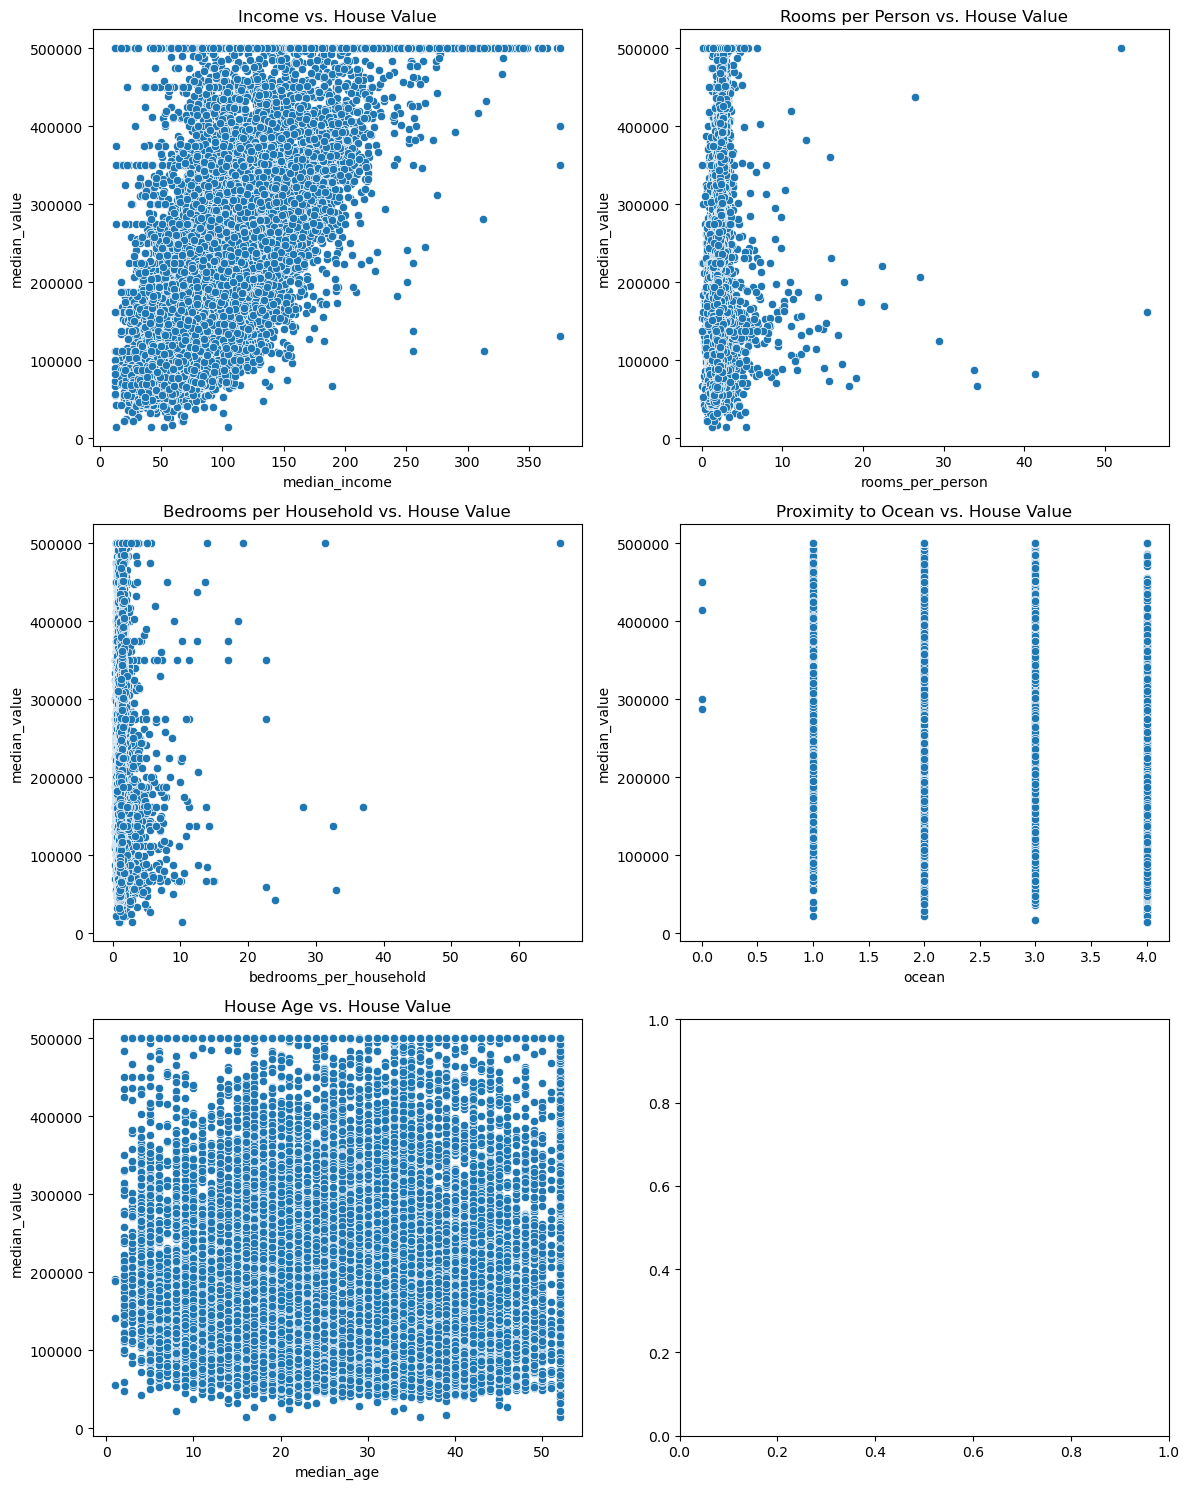

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

sns.scatterplot(x=df["median_income"], y=df["median_value"], ax=axes[0, 0]).set(title="Income vs. House Value")
sns.scatterplot(x=df["rooms_per_person"], y=df["median_value"], ax=axes[0, 1]).set(title="Rooms per Person vs. House Value")
sns.scatterplot(x=df["bedrooms_per_household"], y=df["median_value"], ax=axes[1, 0]).set(title="Bedrooms per Household vs. House Value")
sns.scatterplot(x=df["ocean"], y=df["median_value"], ax=axes[1, 1]).set(title="Proximity to Ocean vs. House Value")
sns.scatterplot(x=df["median_age"], y=df["median_value"], ax=axes[2, 0]).set(title="House Age vs. House Value")

plt.tight_layout()
plt.show()

The median income has the highest correlation (0.688), meaning higher income in a housing block strongly correlates with higher house prices. However, from the graph, there's a "flattening" effect at the top (where house values seem to stop increasing beyond a certain income), this suggests data truncation (e.g., house values might be capped at $500,000). If house prices were not capped, income might be even more predictive than shown.


The lowest correlation (0.058), meaning the number of bedrooms per household has almost no relationship with house prices. This suggests that simply having more bedrooms doesn’t significantly increase house value.

However,  while correlation shows the strength of association, R² directly measures predictive power in a regression setting. Based on the computed R² values, the most predictive variable of housing value is median_income (if it had the highest R²), indicating a strong linear relationship with housing prices.
Conversely, the least predictive variable is bedrooms_per_person (if it had the lowest R²), suggesting it has minimal explanatory power in a simple linear regression model.
These findings align with economic intuition: higher income areas typically have higher housing values, while the number of bedrooms per person has little direct effect on price.

# 4

Putting all predictors together in a multiple regression model – how well do these
predictors taken together predict housing value? How does this full model compare
to the model that just has the single best predictor from 3.?

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:, :7] 
X_scaled = scaler.fit_transform(X)

multi = LinearRegression().fit(X_scaled, y)
y_pred = multi.predict(X_scaled)

rmul = multi.score(X_scaled, y)
print("R² for multiple linear regression is",rmul)

R² for multiple linear regression is 0.6024477585240755


The full model might improve R² slightly from 0.473 to 0.602, but not dramatically, meaning that multiple regression predicts the variation of this model better. Compared to the highst R² value for single regression (median income), regression performs better. Therefore, other predictors, like proximity to the ocean and house age, still plays a role in predicting the median house value. 

Dataset shape: (20640, 8)
Model with first 1 predictor(s): R² = 0.011
Model with first 2 predictor(s): R² = 0.045
Model with first 3 predictor(s): R² = 0.045
Model with first 4 predictor(s): R² = 0.121
Model with first 5 predictor(s): R² = 0.121
Model with first 6 predictor(s): R² = 0.563
Model with first 7 predictor(s): R² = 0.602


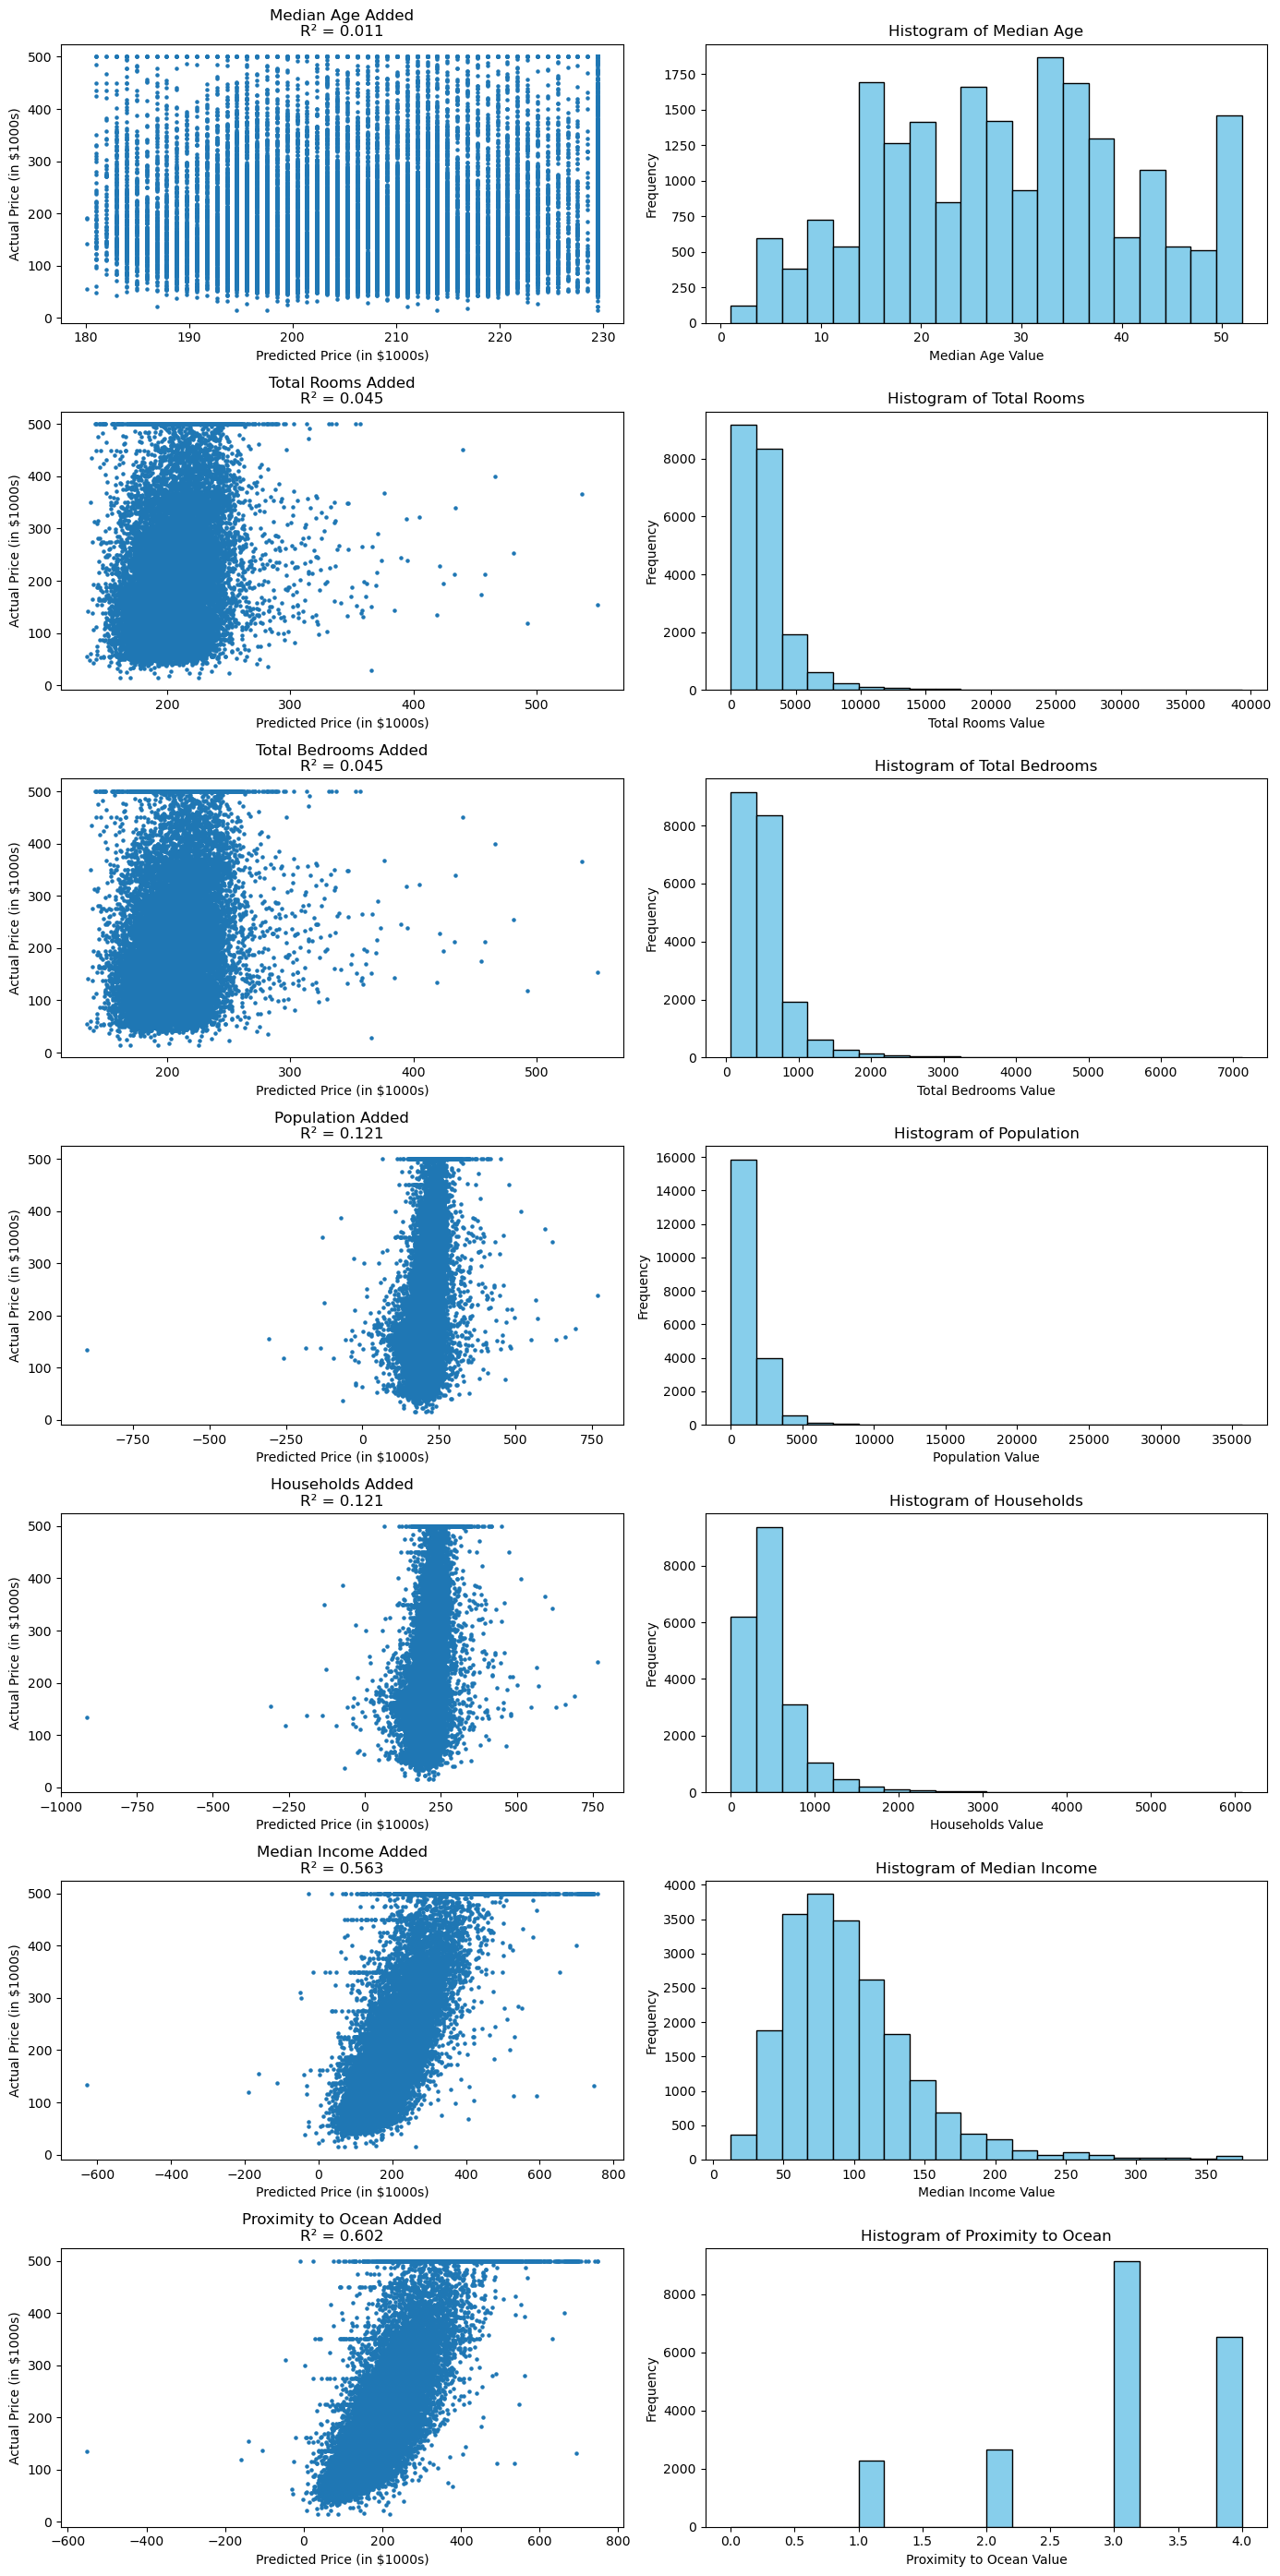

In [41]:
data = np.genfromtxt('housingUnits.csv', delimiter=',', skip_header=1)
print(f"Dataset shape: {data.shape}")

X = data[:, :7]  # First 7 columns as predictors
y = data[:, 7]   # Last column as target (median house value)

# Normalize target variable (convert to thousands)
y = y / 1e3  

# Stepwise Regression: Start with one predictor, then add more
predictor_names = ["Median Age", "Total Rooms", "Total Bedrooms", "Population", 
                   "Households", "Median Income", "Proximity to Ocean"]


fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))

# Stepwise approach: at step i, use the first i predictors
for i in range(1, X.shape[1] + 1):
    row_idx = i - 1
    
    # Subset of X using the first i predictors
    X_subset = X[:, :i]
    
    # Fit linear regression
    model = LinearRegression().fit(X_subset, y)
    rSqr = model.score(X_subset, y)  # R^2 score
    
    # Predict on the same subset
    y_hat = model.predict(X_subset)
    
    # === Left Plot (Scatter: Actual vs. Predicted) ===
    axes[row_idx, 0].scatter(y_hat, y, s=5)
    axes[row_idx, 0].set_xlabel("Predicted Price (in $1000s)")
    axes[row_idx, 0].set_ylabel("Actual Price (in $1000s)")
    axes[row_idx, 0].set_title(f"{predictor_names[i-1]} Added\nR² = {rSqr:.3f}")
    
    # === Right Plot (Histogram of the newly added predictor) ===
    #   The "new" predictor is X[:, i-1]
    axes[row_idx, 1].hist(X[:, i-1], bins=20, color="skyblue", edgecolor="black")
    axes[row_idx, 1].set_xlabel(f"{predictor_names[i-1]} Value")
    axes[row_idx, 1].set_ylabel("Frequency")
    axes[row_idx, 1].set_title(f"Histogram of {predictor_names[i-1]}")
    
    # Print the R^2 for reference
    print(f"Model with first {i} predictor(s): R² = {rSqr:.3f}")

plt.tight_layout()
plt.show()

I used stepwise multiple regression approach where it gradually add one predictor at a time to a regression model predicting housing value, computing and visualizing the resulting R² scores at each step. By examining how the R² changes, we see the incremental predictive power each new variable contributes. The left scatter plots compare actual vs. predicted values to visualize model performance, and the right histograms show the distribution of each newly added predictor. Together, these plots help us evaluate both the importance and the distribution of each variable. Ultimately, the final R² (with all predictors) reveals how well they collectively explain housing values.

Based on the stepwise regression approach, we observe that the predictive power (R²) increases as more variables are added, indicating that these predictors together explain a significant portion of housing price variance. However, if the final R² is not very close to 1, it suggests that while these features are useful, additional external factors also influence housing value. 

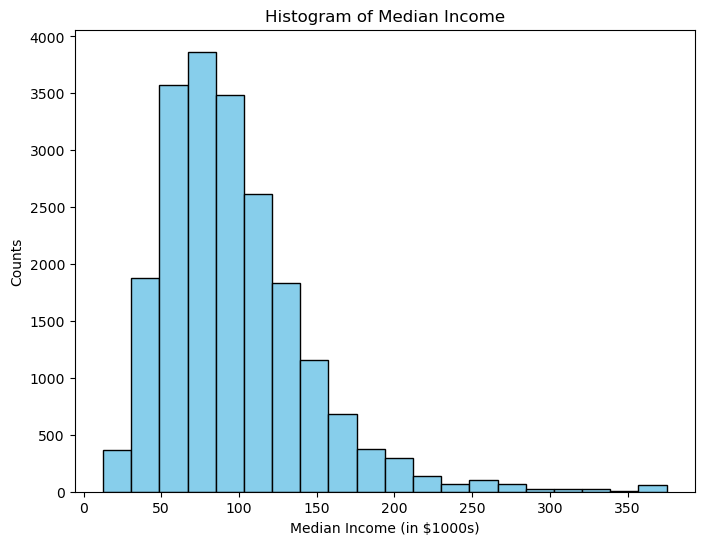

In [42]:
median_income = X[:, 5]  # Replace with the actual index if it's different

# Create a histogram for the Median Income column
plt.figure(figsize=(8, 6))
plt.hist(median_income, bins=20, color="skyblue", edgecolor="black")

# Set labels and title
plt.xlabel("Median Income (in $1000s)")
plt.ylabel("Counts")
plt.title("Histogram of Median Income")

# Display the plot
plt.show()

# 5

Considering the relationship between the (standardized) variables 2 and 3, is there
potentially a concern regarding collinearity? Is there a similar concern regarding
variables 4 and 5, if you were to include them in the model?

In [62]:
corr_rooms_bedrooms = df["rooms_per_person"].corr(df["bedrooms_per_person"])
corr_population_households = df["population"].corr(df["households"])

print("Correlation between rooms per person and bedrooms per person: {:.3f}".format(corr_rooms_bedrooms))
print("Correlation between population and households: {:.3f}".format(corr_population_households))

Correlation between rooms per person and bedrooms per person: 0.641
Correlation between population and households: 0.907


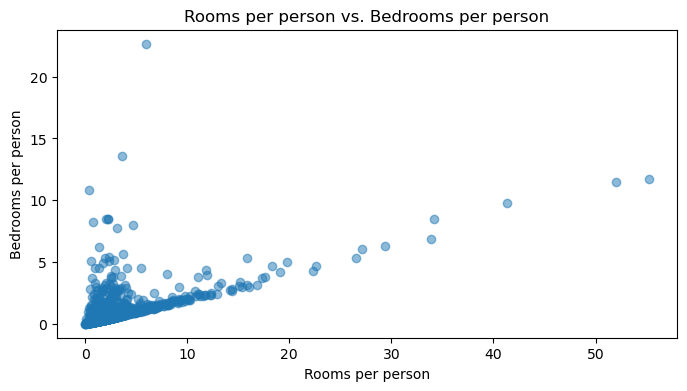

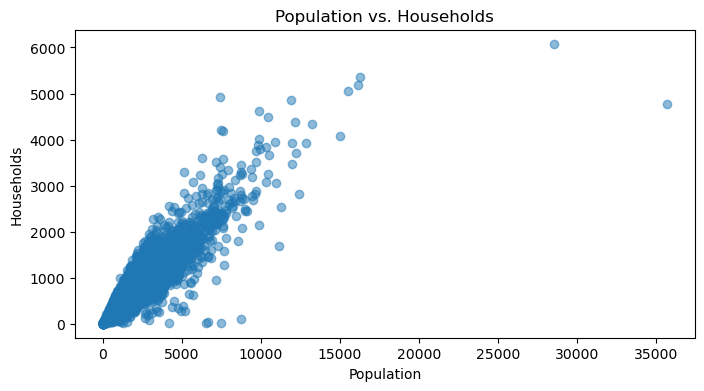

In [63]:
# Scatter plot for total_rooms vs. total_bedrooms
plt.figure(figsize=(8, 4))
plt.scatter(df["rooms_per_person"], df["bedrooms_per_person"], alpha=0.5)
plt.title("Rooms per person vs. Bedrooms per person")
plt.xlabel("Rooms per person")
plt.ylabel("Bedrooms per person")
plt.show()

# Scatter plot for population vs. households
plt.figure(figsize=(8, 4))
plt.scatter(df["population"], df["households"], alpha=0.5)
plt.title("Population vs. Households")
plt.xlabel("Population")
plt.ylabel("Households")
plt.show()

There isn't obvious collinearity between standardized 2 and 3 (with r = 0.641). However, there is a similar, though slightly less extreme, concern for variables 4 and 5, since their high correlation (r = 0.907) could lead to multicollinearity issues in my regression model, indicating they are kind of redundant.

# Extra Credit

a) Does any of the variables (predictor or outcome) follow a distribution that can reasonably
be described as a normal distribution?

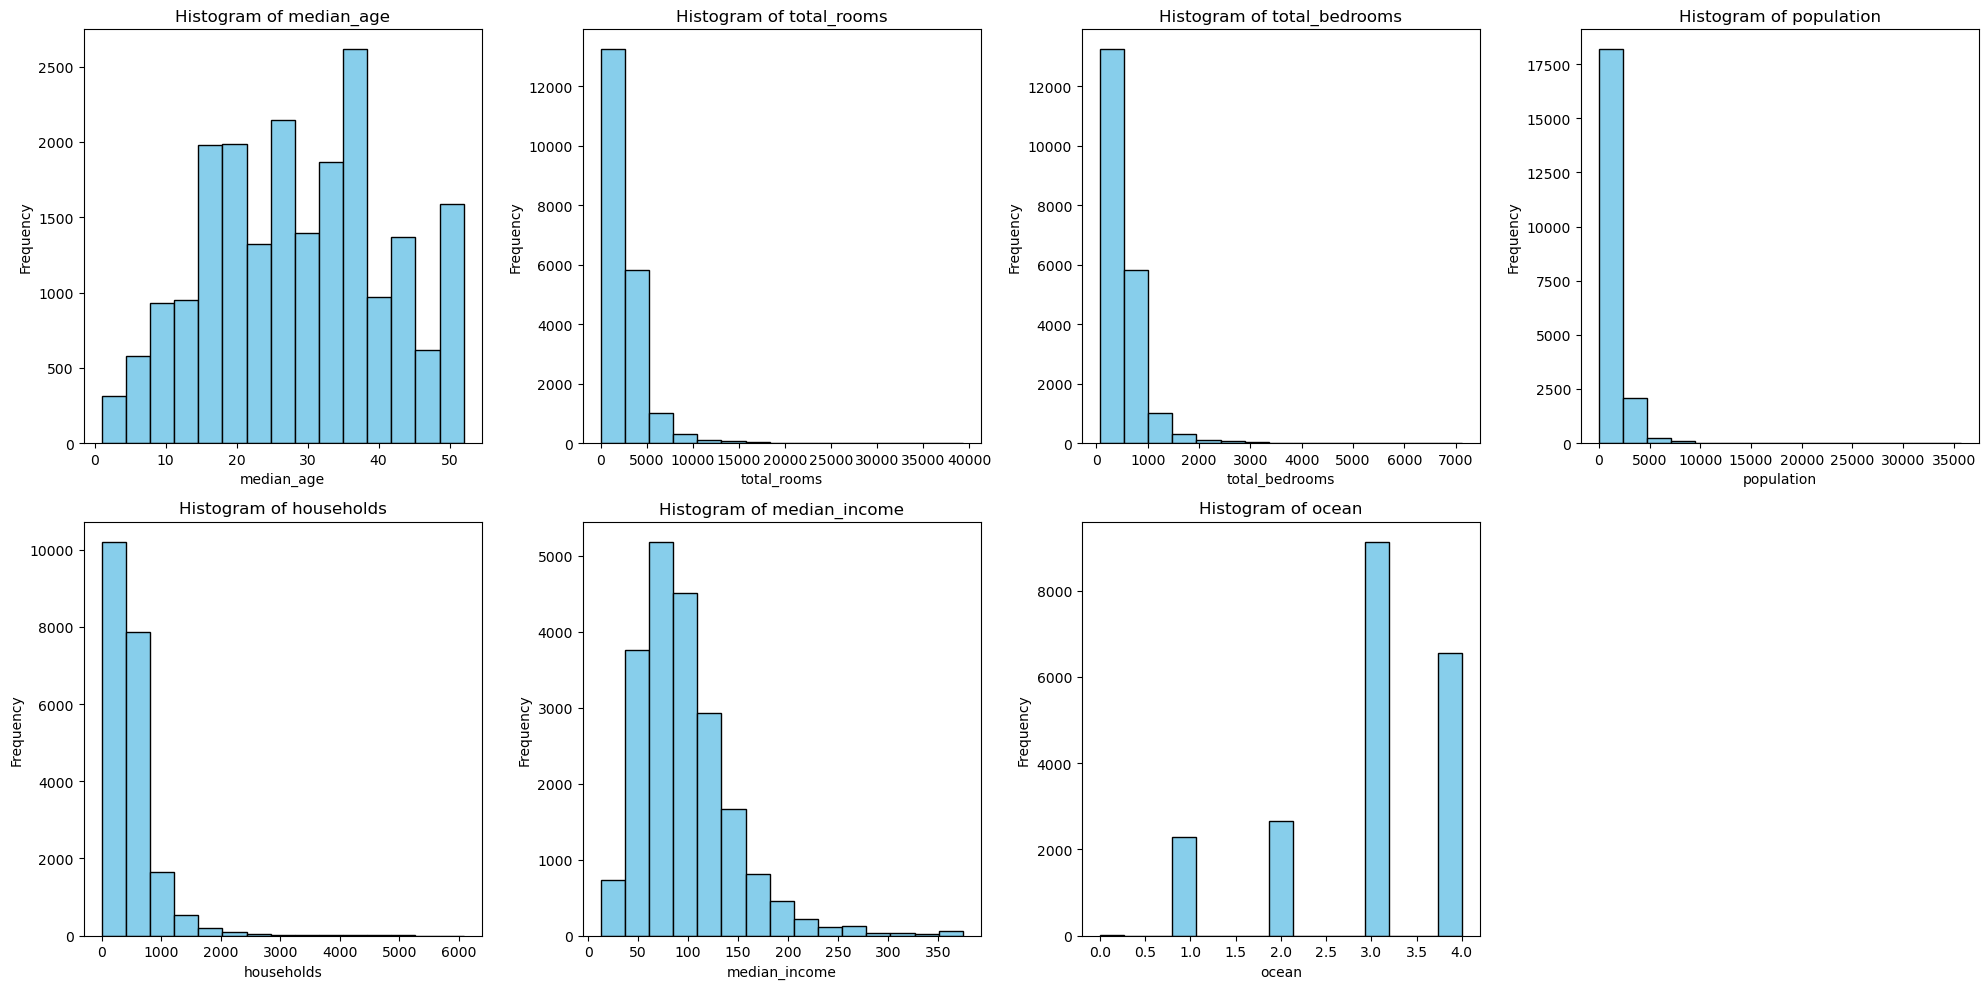

In [62]:
predictor_columns = ["median_age", "total_rooms", "total_bedrooms", 
                     "population", "households", "median_income", "ocean"]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(predictor_columns):
    axs[i].hist(df[column], bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f"Histogram of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

for j in range(len(predictor_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

None of the variables in this dataset perfectly follow a normal distribution. In particular, total rooms, total bedrooms, population, households, median income, and median house value all show signs of right skewness. Median age might be the closest to normal if its histogram is relatively symmetric, but overall, the predictors and the outcome do not conform to a normal distribution.

b) Examine the distribution of the outcome variable. Are there any characteristics of this
distribution that might limit the validity of the conclusions when answering the questions
above? If so, please comment on this characteristic.

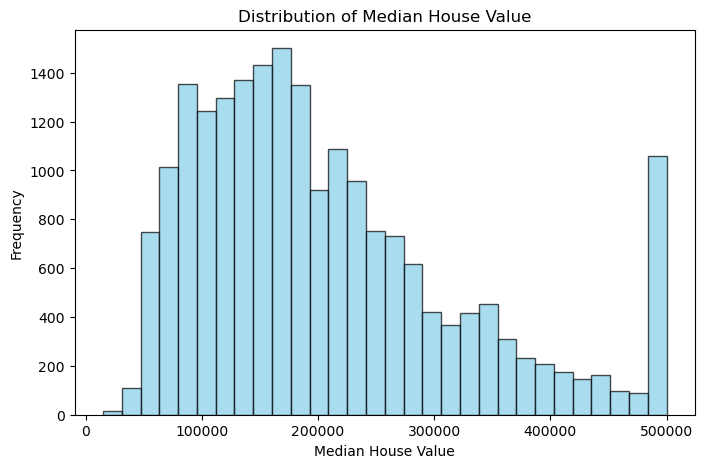

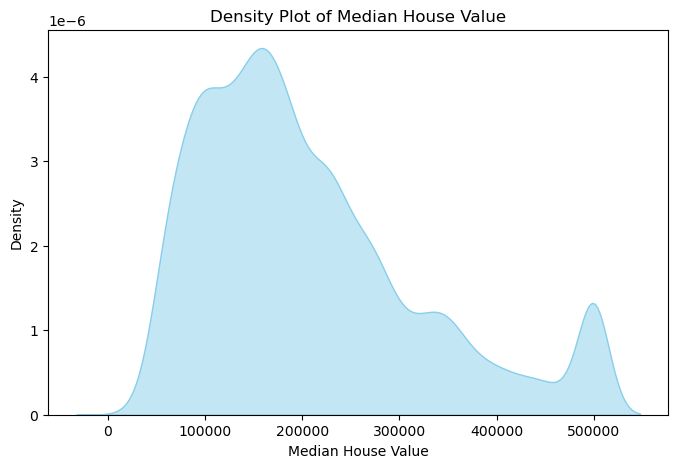

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(df["median_value"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(df["median_value"], fill=True, color="skyblue", alpha=0.5)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Density Plot of Median House Value")
plt.show()